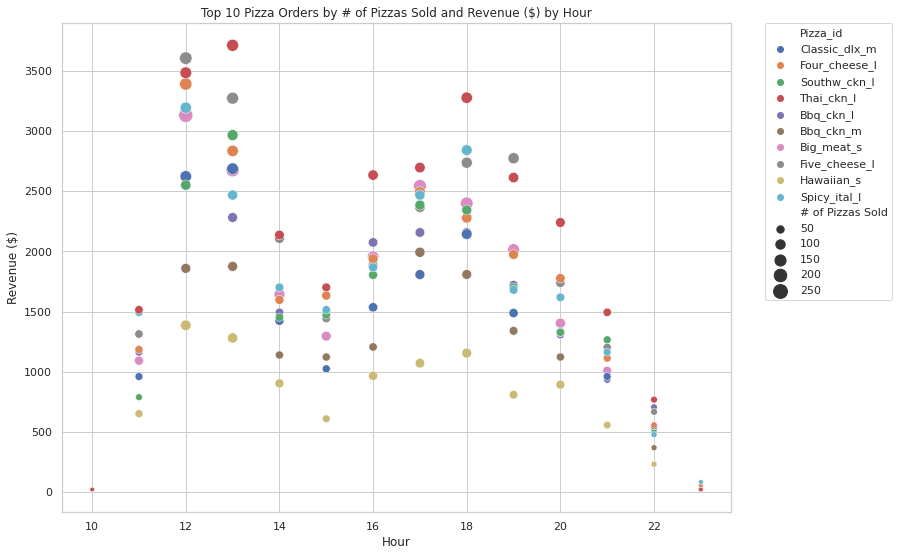

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Resultsd.csv')

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['revenue'] = df['price']

df.set_index('datetime', inplace=True)

hourly_data = df.groupby([df.index.hour, 'pizza_id']).agg({'order_details_id': 'count', 'revenue': 'sum'}).reset_index()

hourly_data.columns = ['hour', 'pizza_id', 'count', 'revenue']

top_pizzas = hourly_data.groupby('pizza_id')['count'].sum().nlargest(10).index

hourly_data = hourly_data[hourly_data['pizza_id'].isin(top_pizzas)]

sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
scatter = sns.scatterplot(x='hour', y='revenue', hue='pizza_id', size='count', sizes=(20, 200), data=hourly_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


handles, labels = scatter.get_legend_handles_labels()
labels = ['# of Pizzas Sold' if label == 'count' else label.capitalize() for label in labels]
scatter.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Top 10 Pizza Orders by # of Pizzas Sold and Revenue ($) by Hour')
plt.xlabel('Hour')
plt.ylabel('Revenue ($)')
plt.savefig('CHART13.png', dpi=300, bbox_inches='tight')
